<a href="https://colab.research.google.com/github/Satwikram/Online-Shoppers-Intention/blob/master/Shopping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Author: Satwik Ram K

### Online Shoppers intentions Prediction

### Data Description

Column Descriptions:

Administrative: This is the number of pages of this type (administrative) that the user visited.

Administrative_Duration: This is the amount of time spent in this category of pages.

Informational: This is the number of pages of this type (informational) that the user visited.

Informational_Duration: This is the amount of time spent in this category of pages.

ProductRelated: This is the number of pages of this type (product related) that the user visited.

ProductRelated_Duration: This is the amount of time spent in this category of pages.

BounceRates: The percentage of visitors who enter the website through that page and exit without triggering any additional tasks.

ExitRates: The percentage of pageviews on the website that end at that specific page.

PageValues: The average value of the page averaged over the value of the target page and/or the completion of an eCommerce transaction.
More information about how this is calculated

SpecialDay: This value represents the closeness of the browsing date to special days or holidays (eg Mother's Day or Valentine's day) in which the transaction is more likely to be finalized. More information about how this value is calculated below.

Month: Contains the month the pageview occurred, in string form.

OperatingSystems: An integer value representing the operating system that the user was on when viewing the page.

Browser: An integer value representing the browser that the user was using to view the page.

Region: An integer value representing which region the user is located in.

TrafficType: An integer value representing what type of traffic the user is categorized into.
Read more about traffic types here.

VisitorType: A string representing whether a visitor is New Visitor, Returning Visitor, or Other.

Weekend: A boolean representing whether the session is on a weekend.

Revenue: A boolean representing whether or not the user completed the purchase.

### Connecting to Kaggle

In [1]:
from google.colab import files

files.upload()

! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/

! chmod 600 ~/.kaggle/kaggle.json



Saving kaggle.json to kaggle.json


###Downloading Dataset from Kaggle

In [2]:
! kaggle datasets download -d henrysue/online-shoppers-intention

  0% 0.00/252k [00:00<?, ?B/s]
100% 252k/252k [00:00<00:00, 38.2MB/s]


### Unzipping the Dataset

In [3]:
! unzip /content/online-shoppers-intention.zip

Archive:  /content/online-shoppers-intention.zip
  inflating: online_shoppers_intention.csv  


### Imorting Dependencies

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Importing Dataset

In [5]:
dataset = pd.read_csv("online_shoppers_intention.csv")

### Exploratory Data Analysis (EDA) 

In [6]:
dataset.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [7]:
dataset.tail()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False
12329,0,0.0,0,0.0,3,21.250000,0.000000,0.066667,0.000000,0.0,Nov,3,2,1,2,New_Visitor,True,False


In [8]:
dataset.shape

(12330, 18)

In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [10]:
dataset.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157213,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


### Checking for Null Values

In [11]:
dataset.isna().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [12]:
dataset.describe(include='all')

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330,12330.000000,12330.000000,12330.000000,12330.000000,12330,12330,12330
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,NaN,3,2,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,May,NaN,NaN,NaN,NaN,Returning_Visitor,False,False
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3364,NaN,NaN,NaN,NaN,10551,9462,10422
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,NaN,2.124006,2.357097,3.147364,4.069586,NaN,NaN,NaN
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,NaN,0.911325,1.717277,2.401591,4.025169,NaN,NaN,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,1.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,NaN,2.000000,2.000000,1.000000,2.000000,NaN,NaN,NaN
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,NaN,2.000000,2.000000,3.000000,2.000000,NaN,NaN,NaN
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157213,0.016813,0.050000,0.000000,0.000000,NaN,3.000000,2.000000,4.000000,4.000000,NaN,NaN,NaN


In [13]:
dataset.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [14]:
for column in dataset.columns:
    print(column,":Unique Values are:",dataset[column].unique())
    print("---"*40)

Administrative :Unique Values are: [ 0  1  2  4 12  3 10  6  5  9  8 16 13 11  7 18 14 17 19 15 24 22 21 20
 23 27 26]
------------------------------------------------------------------------------------------------------------------------
Administrative_Duration :Unique Values are: [  0.         53.         64.6       ... 167.9107143 305.125
 150.3571429]
------------------------------------------------------------------------------------------------------------------------
Informational :Unique Values are: [ 0  1  2  4 16  5  3 14  6 12  7  9 10  8 11 24 13]
------------------------------------------------------------------------------------------------------------------------
Informational_Duration :Unique Values are: [  0.   120.    16.   ... 547.75 368.25 211.25]
------------------------------------------------------------------------------------------------------------------------
ProductRelated :Unique Values are: [  1   2  10  19   0   3  16   7   6  23  13  20   8   5  32   4 

In [15]:
for column in dataset.columns:
    print(column,":Values Counts:",dataset[column].value_counts())
    print("---"*40)

Administrative :Values Counts: 0     5768
1     1354
2     1114
3      915
4      765
5      575
6      432
7      338
8      287
9      225
10     153
11     105
12      86
13      56
14      44
15      38
16      24
17      16
18      12
19       6
24       4
22       4
23       3
20       2
21       2
26       1
27       1
Name: Administrative, dtype: int64
------------------------------------------------------------------------------------------------------------------------
Administrative_Duration :Values Counts: 0.000000      5903
4.000000        56
5.000000        53
7.000000        45
11.000000       42
              ... 
294.070513       1
90.875000        1
97.333333        1
53.166667        1
247.083333       1
Name: Administrative_Duration, Length: 3335, dtype: int64
------------------------------------------------------------------------------------------------------------------------
Informational :Values Counts: 0     9699
1     1041
2      728
3      380
4      222
5  

In [16]:
for column in dataset.columns:
    print(column,":Unique Values are:",dataset[column].unique().sum())
    print("---"*40)

Administrative :Unique Values are: 353
------------------------------------------------------------------------------------------------------------------------
Administrative_Duration :Unique Values are: 789369.647712122
------------------------------------------------------------------------------------------------------------------------
Informational :Unique Values are: 145
------------------------------------------------------------------------------------------------------------------------
Informational_Duration :Unique Values are: 356583.066448855
------------------------------------------------------------------------------------------------------------------------
ProductRelated :Unique Values are: 54520
------------------------------------------------------------------------------------------------------------------------
ProductRelated_Duration :Unique Values are: 14299069.846977383
---------------------------------------------------------------------------------------------

### Visulizing the Data Distrubtion

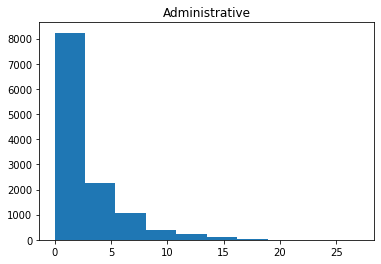

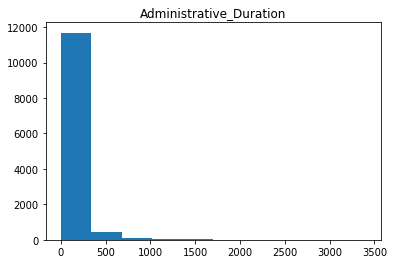

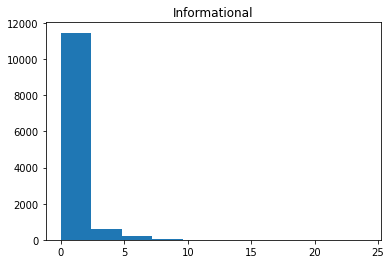

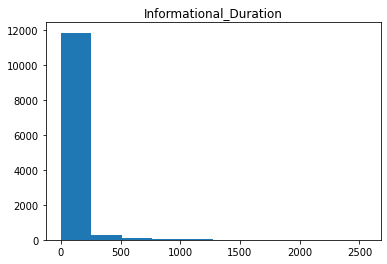

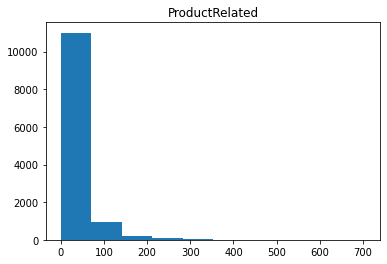

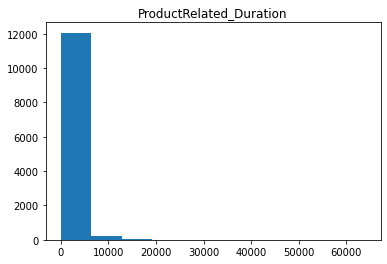

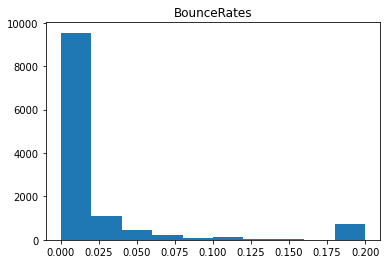

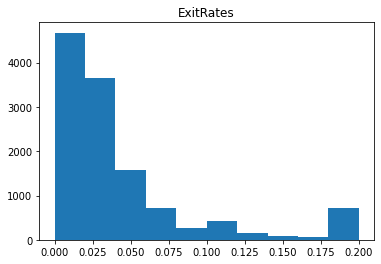

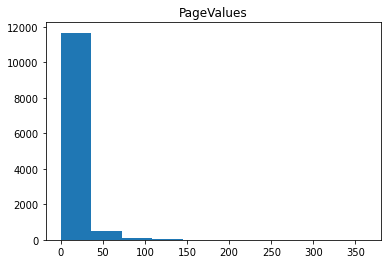

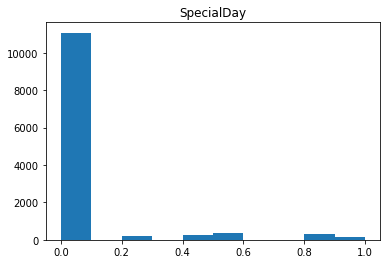

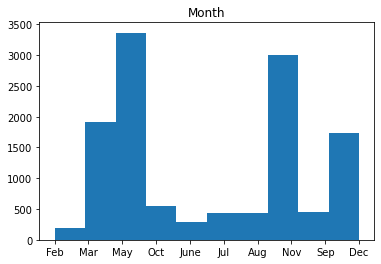

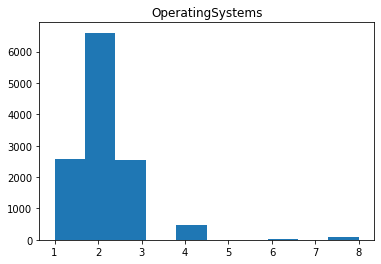

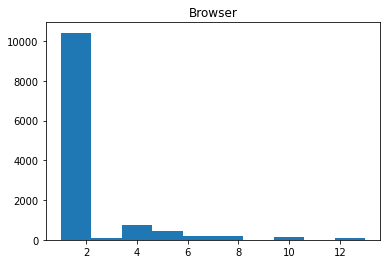

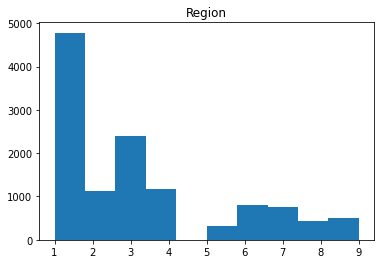

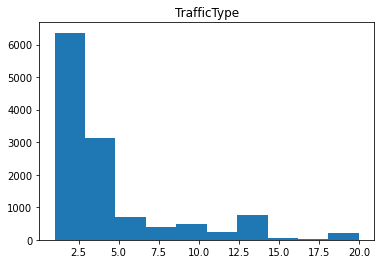

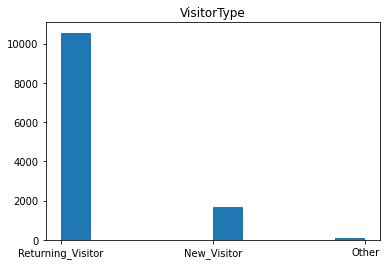

<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


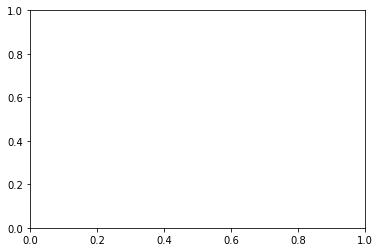

In [17]:
for column in dataset.columns:
  try:
    plt.hist(dataset[column])
    plt.title(column)
    plt.show()
  except:
    pass

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


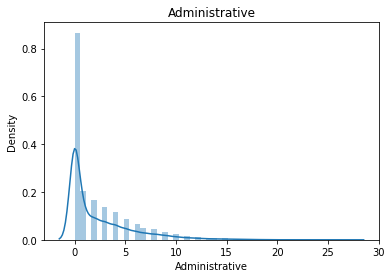

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


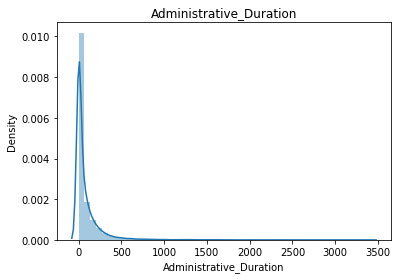

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


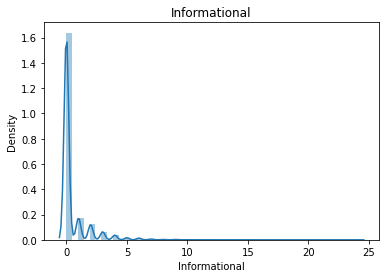

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


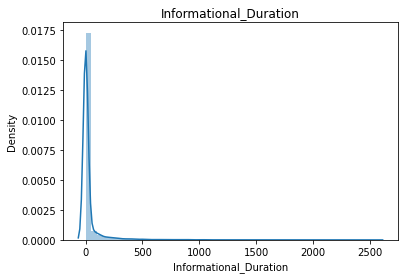

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


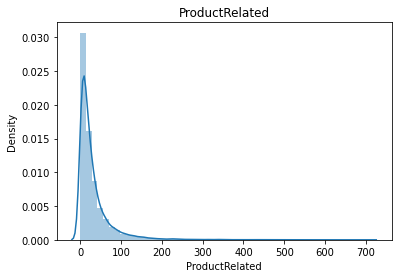

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


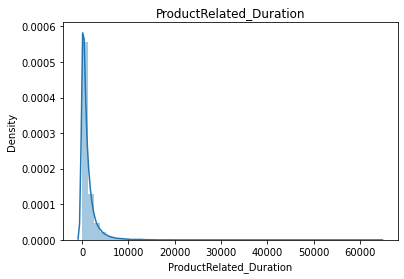

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


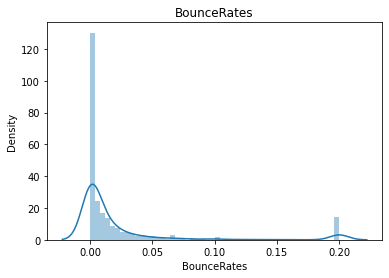

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


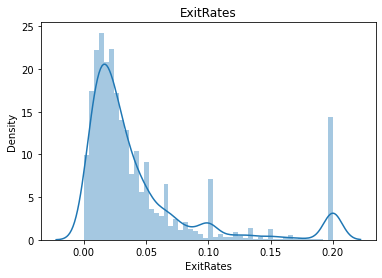

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


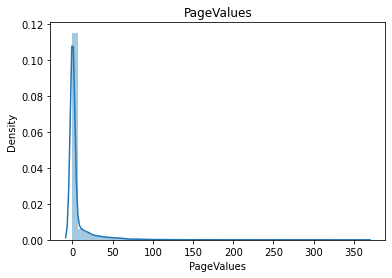

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


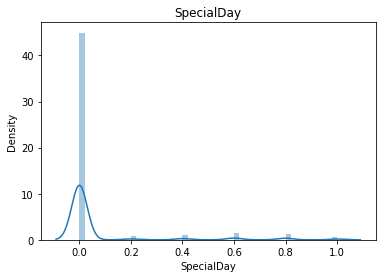

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


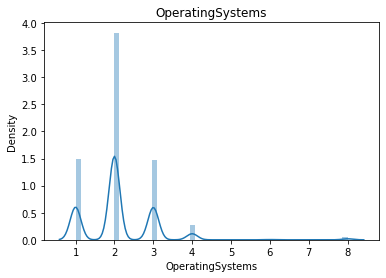

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


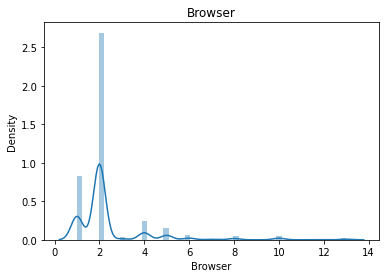

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


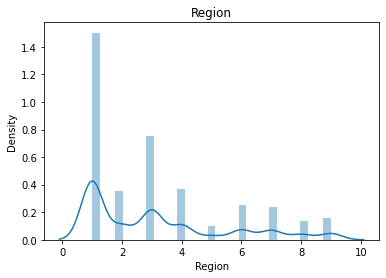

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


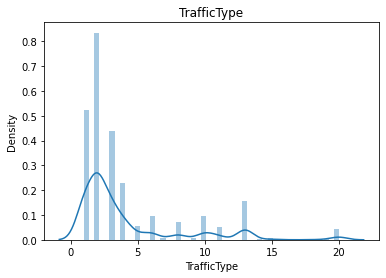

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


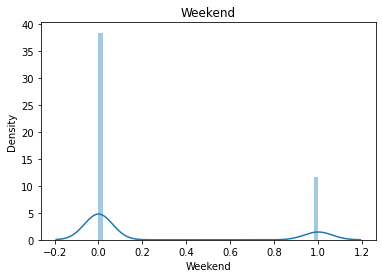

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


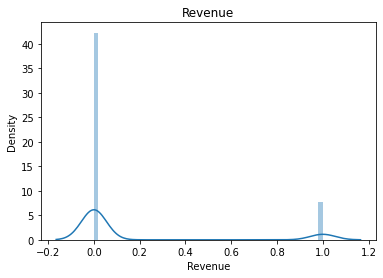

In [18]:
for column in dataset.columns:
  try:
    sns.distplot(dataset[column], hist=True)
    plt.title(column)
    plt.show()
  except:
    pass

### Onehot Encoding

In [19]:
columns = []

In [20]:
for column in dataset.columns:
  if dataset[column].dtype == "object":
    print(column)
    columns.append(column)

Month
VisitorType


In [21]:
print(columns)

['Month', 'VisitorType']


In [22]:
for column in columns:
  df = pd.get_dummies(dataset[column], drop_first = True)
  dataset.drop(column, axis = 1, inplace = True)
  dataset = pd.concat([dataset, df], axis = 1)

In [23]:
dataset.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue,Dec,Feb,Jul,June,Mar,May,Nov,Oct,Sep,Other,Returning_Visitor
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,1,1,1,1,False,False,0,1,0,0,0,0,0,0,0,0,1
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,2,2,1,2,False,False,0,1,0,0,0,0,0,0,0,0,1
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,4,1,9,3,False,False,0,1,0,0,0,0,0,0,0,0,1
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,3,2,2,4,False,False,0,1,0,0,0,0,0,0,0,0,1
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,3,3,1,4,True,False,0,1,0,0,0,0,0,0,0,0,1


In [24]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  OperatingSystems         12330 non-null  int64  
 11  Browser                  12330 non-null  int64  
 12  Region                   12330 non-null  int64  
 13  TrafficType              12330 non-null  int64  
 14  Weekend               

In [25]:
columns = ['Weekend', 'Revenue']

In [26]:
for column in columns:
  df = pd.get_dummies(dataset[column], drop_first = True)
  dataset.drop(column, axis = 1, inplace = True)
  dataset = pd.concat([dataset, df], axis = 1)

In [27]:
dataset.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Dec,Feb,Jul,June,Mar,May,Nov,Oct,Sep,Other,Returning_Visitor,True,True
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,1,1,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,2,2,1,2,0,1,0,0,0,0,0,0,0,0,1,0,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,4,1,9,3,0,1,0,0,0,0,0,0,0,0,1,0,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,3,2,2,4,0,1,0,0,0,0,0,0,0,0,1,0,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,3,3,1,4,0,1,0,0,0,0,0,0,0,0,1,1,0


In [28]:
dataset.shape

(12330, 27)

In [29]:
Y = dataset.iloc[:, 26:]

In [30]:
Y

,True
0,0
1,0
2,0
3,0
4,0
...,...
12325,0
12326,0
12327,0
12328,0


In [31]:
dataset = dataset.iloc[:, :26]

In [32]:
dataset.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Dec,Feb,Jul,June,Mar,May,Nov,Oct,Sep,Other,Returning_Visitor,True
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,1,1,1,1,0,1,0,0,0,0,0,0,0,0,1,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,2,2,1,2,0,1,0,0,0,0,0,0,0,0,1,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,4,1,9,3,0,1,0,0,0,0,0,0,0,0,1,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,3,2,2,4,0,1,0,0,0,0,0,0,0,0,1,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,3,3,1,4,0,1,0,0,0,0,0,0,0,0,1,1


### Renaming the Column Name for Weekend

In [33]:
dataset.rename(columns={True: 'Weekend'}, inplace = True)

In [34]:
dataset = pd.concat([dataset, Y], axis = 1)

In [35]:
dataset.head(0)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Dec,Feb,Jul,June,Mar,May,Nov,Oct,Sep,Other,Returning_Visitor,Weekend,True


### Renaming the Revenue Column

In [36]:
dataset.rename(columns={True: 'Revenue'}, inplace = True)

In [37]:
dataset.head(0)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Dec,Feb,Jul,June,Mar,May,Nov,Oct,Sep,Other,Returning_Visitor,Weekend,Revenue


In [38]:
dataset.head(5)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Dec,Feb,Jul,June,Mar,May,Nov,Oct,Sep,Other,Returning_Visitor,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,1,1,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,2,2,1,2,0,1,0,0,0,0,0,0,0,0,1,0,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,4,1,9,3,0,1,0,0,0,0,0,0,0,0,1,0,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,3,2,2,4,0,1,0,0,0,0,0,0,0,0,1,0,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,3,3,1,4,0,1,0,0,0,0,0,0,0,0,1,1,0


In [39]:
Y = dataset['Revenue']

In [40]:
dataset.drop("Revenue", axis = 1, inplace = True)

In [41]:
Y

0        0
1        0
2        0
3        0
4        0
        ..
12325    0
12326    0
12327    0
12328    0
12329    0
Name: Revenue, Length: 12330, dtype: uint8

### Dividing the Dataset into X and Y





In [42]:
X = dataset

In [43]:
print(X.shape)
print(Y.shape)

(12330, 26)
(12330,)


### Splitting Data into Train and Test

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 388)

### Normalizing the dataset

In [46]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [47]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [48]:
X_train.shape[1]

26

In [49]:
y_train = np.array(y_train)
y_test = np.array(y_test)

### Building the Model!

In [50]:
import tensorflow as tf
from tensorflow import keras

In [51]:
def build_model():
  model = tf.keras.models.Sequential([
                                      
          tf.keras.layers.Dense(input_dim = X_train.shape[1], activation = 'relu', use_bias = True, kernel_initializer = 'he_normal', units = 64),

          tf.keras.layers.Dense(units = 512, activation = 'relu', kernel_initializer = 'he_normal'),

          tf.keras.layers.Dense(units = 1, activation = 'sigmoid')

          ])
                                      
  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics = ['accuracy'])
          
  return model


In [52]:
model = build_model()

In [53]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                1728      
_________________________________________________________________
dense_1 (Dense)              (None, 512)               33280     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 513       
Total params: 35,521
Trainable params: 35,521
Non-trainable params: 0
_________________________________________________________________


In [54]:
history = model.fit(X_train, y_train, validation_split = 0.2, epochs = 50)

Epoch 1/50
247/247 [==============================] - 1s 2ms/step - loss: 0.3130 - accuracy: 0.8748 - val_loss: 0.2887 - val_accuracy: 0.8819
Epoch 2/50
247/247 [==============================] - 0s 2ms/step - loss: 0.2689 - accuracy: 0.8897 - val_loss: 0.2848 - val_accuracy: 0.8834
Epoch 3/50
247/247 [==============================] - 0s 2ms/step - loss: 0.2520 - accuracy: 0.8952 - val_loss: 0.2723 - val_accuracy: 0.8900
Epoch 4/50
247/247 [==============================] - 0s 2ms/step - loss: 0.2413 - accuracy: 0.8975 - val_loss: 0.2735 - val_accuracy: 0.8895
Epoch 5/50
247/247 [==============================] - 0s 2ms/step - loss: 0.2339 - accuracy: 0.9029 - val_loss: 0.2751 - val_accuracy: 0.8925
Epoch 6/50
247/247 [==============================] - 0s 2ms/step - loss: 0.2259 - accuracy: 0.9051 - val_loss: 0.2654 - val_accuracy: 0.8946
Epoch 7/50
247/247 [==============================] - 0s 2ms/step - loss: 0.2194 - accuracy: 0.9084 - val_loss: 0.2758 - val_accuracy: 0.8895
Epoch 

### Saving the model

In [55]:
tf.saved_model.save(model, 'shoppers')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: shoppers/assets


### Loading the model

In [56]:
loaded = tf.saved_model.load('/content/shoppers')

In [57]:
print(list(loaded.signatures.keys()))

['serving_default']


In [58]:
infer = loaded.signatures["serving_default"]

In [59]:
infer

<ConcreteFunction signature_wrapper(dense_input) at 0x7F40D9603DA0>

In [60]:
print(infer.structured_outputs)

{'dense_2': TensorSpec(shape=(None, 1), dtype=tf.float32, name='dense_2')}


### Predicting

In [61]:
y_pred = model.predict([X_test])

In [62]:
y_pred = y_pred >= 0.5

In [63]:
for i in range(len(y_pred)):
  if y_pred[i] == True:
    y_pred[i] = 1
  else:
    y_pred[i] = 0

In [75]:
y_result = []

In [76]:
y_result

[]

In [78]:
for i in range(len(y_pred)):
  y_result.append(int(y_pred[i]))

In [ ]:
y_result

In [81]:
model.evaluate(X_test, y_test)

78/78 [==============================] - 0s 1ms/step - loss: 0.5291 - accuracy: 0.8759


[0.5291444063186646, 0.8759124279022217]

### Confusion Matrix and Accuracy Score

In [83]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_result)
score = accuracy_score(y_test, y_result)

In [85]:
print(score*100)
cm

87.59124087591242


array([[1946,  151],
       [ 155,  214]])

### Downloading the model to local machine

In [66]:
#from google.colab import files

In [67]:
#files.download('/content/shoppers')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Tuning the model

In [86]:
import IPython

In [87]:
!pip install -q -U keras-tuner

     |████████████████████████████████| 61kB 2.6MB/s 


In [102]:
import kerastuner as kt
from tensorflow.keras.layers import LeakyReLU

#### Define the model for Tuning

In [107]:
def model_builder(hp):
  model = tf.keras.models.Sequential()

  # Tune the number of units in the first Dense layer
  # Choose an optimal value between 32-512
  hp_units = hp.Int('units', min_value = 32, max_value = 512, step = 32)
  hp_kernal = hp.Choice('kernel_initializer' , values = ['uniform', 'glorot_uniform'])

  model.add(tf.keras.layers.Dense(input_dim = X_train.shape[1], units = hp_units, activation = 'relu', kernel_initializer = hp_kernal))

  # Tune the number of units in the first Dense layer
  # Choose an optimal value between 256-1024
  hp_units1 = hp.Int('units', min_value = 256, max_value = 1024, step = 32)
  hp_kernal1 = hp.Choice('kernel_initializer' , values = ['uniform', 'glorot_uniform'])

  model.add(tf.keras.layers.Dense(units = hp_units1, activation = 'relu', kernel_initializer = hp_kernal1))

  model.add(tf.keras.layers.Dense(1, activation = 'sigmoid'))

  hp_optimizer = hp.Choice('optimizer',  values = ['adam', 'RMSProp'])

  model.compile(optimizer = hp_optimizer,
                loss = 'binary_crossentropy', 
                metrics = ['accuracy'])
  
  return model

#### Instantiate the tuner and perform hypertuning

In [108]:
tuner = kt.Hyperband(model_builder,
                     objective = 'val_accuracy', 
                     max_epochs = 100,
                     factor = 3,
                     directory = 'tunded_model',
                     project_name = 'shopping')

INFO:tensorflow:Reloading Oracle from existing project tunded_model/shopping/oracle.json
INFO:tensorflow:Reloading Tuner from tunded_model/shopping/tuner0.json


#### Callbacks

In [109]:
class ClearTrainingOutput(tf.keras.callbacks.Callback):
  def on_train_end(*args, **kwargs):
    IPython.display.clear_output(wait = True)

In [110]:
tuner.search(X_train, y_train, epochs = 100, validation_split = 0.2, callbacks = [ClearTrainingOutput()])

INFO:tensorflow:Oracle triggered exit


In [111]:
# Get the optimal hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials = 1)[0]


### Rebuilding the model

In [114]:
tuned_model = tuner.hypermodel.build(best_hps)

In [ ]:
tuned_model.fit(X_train, y_train, validation_split = 0.2, epochs = 100)

In [116]:
tuned_model.evaluate(X_test, y_test)

78/78 [==============================] - 0s 2ms/step - loss: 1.7327 - accuracy: 0.8735


[1.7327076196670532, 0.8734793066978455]

### Saving Tuned Model

In [119]:
#Can't improve the model
#Saving the tuned model
tf.saved_model.save(tuned_model, 'shopping1')


INFO:tensorflow:Assets written to: shopping1/assets


### Downloading the saved model to local machine

In [121]:
! zip -r 'shoppers.zip' '/content/shopping1'

  adding: content/shopping1/ (stored 0%)
  adding: content/shopping1/assets/ (stored 0%)
  adding: content/shopping1/variables/ (stored 0%)
  adding: content/shopping1/variables/variables.index (deflated 61%)
  adding: content/shopping1/variables/variables.data-00000-of-00001 (deflated 9%)
  adding: content/shopping1/saved_model.pb (deflated 87%)


In [122]:
files.download('/content/shoppers.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>